In [1]:
"""
@author: Burak Kara
S009893
"""

import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

In [2]:
dataset = pd.read_csv("ProjectData.csv", header=None, skiprows=[0])

In [3]:
file = open("output.txt", "w")
exp = "Precision: for all instances predicted as positive, percentage of correct classified\n"
exp+= "Recall   : for all instances actually positive, percentage of correct classified\n"
exp+= "f1 score : a weighted mean of precision and recall\n"
exp+= "Support  : number of actual occurrences of the class in the specified dataset\n\n"

file.write(exp)

296

In [4]:
# fill missing values with 0
dataset.fillna(dataset.median(), inplace= True)

In [5]:
# keep length of dataset to split it into test and train sets
LENGTH = len(dataset)
train_LEN = int(7*LENGTH/10)

# shuffle rows of dataset
dataset = dataset.sample(frac=1)

In [6]:
# split dataset into labels and variables
values = dataset.values
VARIABLES = values[:, 2:]
LABELS = values[:, 1]

train_VARs = VARIABLES[:train_LEN, 2:]
train_LABs = LABELS[:train_LEN]

test_VARs = VARIABLES[train_LEN:, 2:]
test_LABs = LABELS[train_LEN:]

In [7]:
# set learning tool
lda = LinearDiscriminantAnalysis()
model_L = lda.fit(train_VARs, train_LABs)
pred_Lda = model_L.predict(test_VARs)

# create classification report
report_L = classification_report(test_LABs, pred_Lda, digits=5)

# write report to output file
file.write("Linear Discriminant Analysis Report\n")
file.write(report_L)

C:\Users\Burak Kara\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


214

In [8]:
# set learning tool 
qda = QuadraticDiscriminantAnalysis()
model_Q = qda.fit(train_VARs, train_LABs)
pred_Quad = model_Q.predict(test_VARs)

# create classification report
report_Q = classification_report(test_LABs, pred_Quad, digits=5)

# write report to output file
file.write("\nQuadratic Discriminant Analysis Report\n")
file.write(report_Q)

C:\Users\Burak Kara\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


214

In [9]:
# set learning tool
model_Svc = svm.SVC(kernel="rbf", C=1000000, gamma=0.0000000001)
model_Svc.fit(train_VARs, train_LABs)

score = model_Svc.score(train_VARs, train_LABs)
pred_Svc = model_Svc.predict(test_VARs)

# create classification report
report_Svc = classification_report(test_LABs, pred_Svc, digits=5)

# write report to output file
file.write("\nSVC Report\n")
file.write(report_Svc)

214

In [10]:
# set learning tool
model_Svr = svm.SVR(kernel="rbf", C=1000000, gamma=0.0000000001)
model_Svr.fit(train_VARs, train_LABs)

score = model_Svr.score(train_VARs, train_LABs)
pred_Svr = model_Svr.predict(test_VARs)

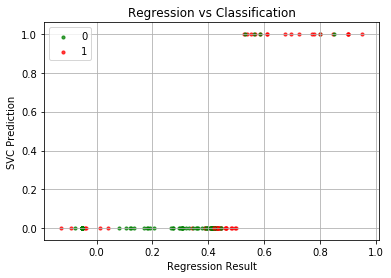

In [11]:
# Create the plot object
_, ax = plt.subplots()

greenCount=0
redCount=0

# Plot the data, set the size (s), color and transparency (alpha) of the points
for x, y, i in zip(pred_Svr, pred_Svc, test_LABs):
    if i == 1:
        c = "r"
        if redCount == 0:
            ax.scatter(x, y, s = 10,  color=c, label="1", alpha = 0.75)
            redCount = 1
    else:
        c = "g"
        if greenCount == 0:
            ax.scatter(x, y, s = 10,  color=c, label="0", alpha = 0.75)
            greenCount = 1
    ax.scatter(x, y, s = 10,  color=c, alpha = 0.75)

plt.legend()
ax.grid()

# Label the axes and provide a title
ax.set_title("Regression vs Classification")
ax.set_xlabel("Regression Result")
ax.set_ylabel("SVC Prediction")

savefig("graph.png")

In [12]:
file.close()